In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aisle = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")

In [2]:
#checking how many different products in the dataset
products['product_id'].nunique()

49688

In [3]:
#checking dataset
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
#merging dataset_orders,products,order_products_prior
order_prior = pd.merge(order_products_prior,orders,on=['order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0


In [7]:
o_pp = pd.merge(order_products_prior,products, on = ['product_id'])
o_pp = pd.merge(o_pp,orders,on=['order_id'])
prior_product = pd.merge(o_pp,aisle,on=['aisle_id'])
prior_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [8]:
#top_prod_aisle contains no duplicate values
aisle_prod = prior_product.groupby(['aisle','product_name'])['order_id'].nunique().sort_values(ascending = False).reset_index(name='count')
top_prod_aisle = aisle_prod.sort_values('count',ascending=False).drop_duplicates(['aisle'])[['aisle','product_name']].reset_index(drop = True)

In [9]:
aisle_prod.head()

,aisle,product_name,count
0,fresh fruits,Banana,472565
1,fresh fruits,Bag of Organic Bananas,379450
2,fresh fruits,Organic Strawberries,264683
3,packaged vegetables fruits,Organic Baby Spinach,241921
4,fresh fruits,Organic Hass Avocado,213584


In [10]:
top_prod_aisle.head()

,aisle,product_name
0,fresh fruits,Banana
1,packaged vegetables fruits,Organic Baby Spinach
2,milk,Organic Whole Milk
3,fresh vegetables,Organic Yellow Onion
4,cream,Organic Half & Half


In [11]:
prior_product['product_name'].value_counts()
#bananas have the highest count == most ordered item

Banana                              472565
Bag of Organic Bananas              379450
Organic Strawberries                264683
Organic Baby Spinach                241921
Organic Hass Avocado                213584
                                     ...  
Strawberry Energy Gel                    1
Hennepin Farmhouse Ale                   1
Glycerine Soap Cucumber                  1
Hot Chili with Beans                     1
Skin Firming Cellulite Gel Cream         1
Name: product_name, Length: 49677, dtype: int64

In [12]:
most_reordered = prior_product.groupby('product_name').reordered.sum()
most_reordered.sort_values(ascending = False)
#people tend to buy same products that they bought last time

product_name
Banana                         398609
Bag of Organic Bananas         315913
Organic Strawberries           205845
Organic Baby Spinach           186884
Organic Hass Avocado           170131
                                ...  
Decorating Green Cake Icing         0
Lemon Ice Tea Liquid                0
Decorating Gel, Red                 0
Decorating Gel White                0
Cld/Flu Van Chrry                   0
Name: reordered, Length: 49677, dtype: int64

In [13]:
prior_product['aisle'].value_counts()
#fresh fruits and fresh vegetables are best selling aisle

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
                               ...   
eye ear care                     8974
baby bath body care              8581
baby accessories                 8160
beauty                           6168
frozen juice                     4853
Name: aisle, Length: 134, dtype: int64

In [14]:
#finding the count of each item reordered according to each user 
cus_aisle = pd.crosstab(prior_product['user_id'], prior_product['aisle'])
cus_aisle.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [15]:
cus_aisle.shape

(206209, 134)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#PCA : standardizing attributes
scaler = StandardScaler()
seg_std = scaler.fit_transform(cus_aisle)

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(seg_std)

PCA()

In [19]:
pca.explained_variance_ratio_

array([0.12924873, 0.034416  , 0.02471911, 0.0189325 , 0.01582632,
       0.01377299, 0.01296737, 0.011761  , 0.01133971, 0.01054893,
       0.01013876, 0.0095299 , 0.00924666, 0.00885283, 0.0085404 ,
       0.00837092, 0.00827408, 0.00825535, 0.00809353, 0.00797717,
       0.00787771, 0.00781151, 0.00777519, 0.00760075, 0.00753859,
       0.0074847 , 0.0073955 , 0.00736954, 0.00732378, 0.0072948 ,
       0.00722577, 0.00720722, 0.00716007, 0.00710207, 0.00707013,
       0.00703506, 0.00697513, 0.00696187, 0.00695276, 0.00687471,
       0.00682585, 0.0068056 , 0.00677384, 0.00674684, 0.00669706,
       0.00664821, 0.00662285, 0.00658385, 0.0065275 , 0.0064805 ,
       0.00646962, 0.00640003, 0.00638077, 0.00635347, 0.00633983,
       0.00627419, 0.00621455, 0.00620549, 0.00617934, 0.00614049,
       0.00608769, 0.00606634, 0.00602634, 0.00601076, 0.00598592,
       0.00597531, 0.00595509, 0.00590752, 0.00589049, 0.00587636,
       0.00582988, 0.00578019, 0.00576515, 0.00572538, 0.00570

Text(0, 0.5, 'Cumulative Variance')

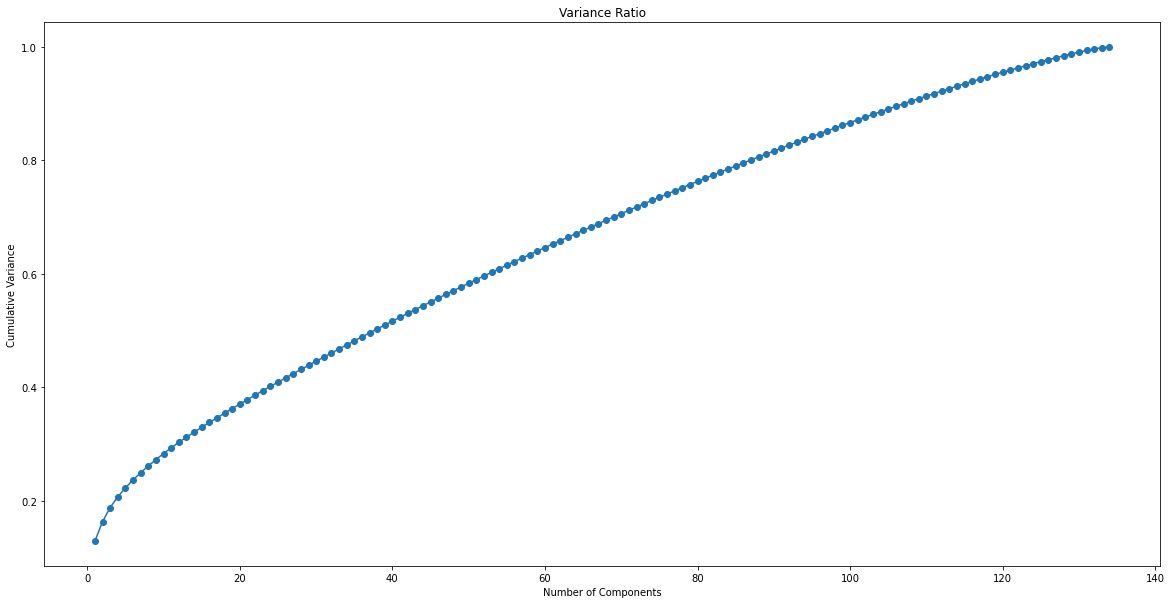

In [21]:
#making cumulative variance graph
plt.figure(figsize=(20,10))
plt.plot(range(1,135),pca.explained_variance_ratio_.cumsum(),linestyle= '-', marker = 'o')
plt.title('Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [23]:
#chose number of components = 17
pca = PCA(n_components = 17)
pca.fit(seg_std)

PCA(n_components=17)

In [24]:
pca.transform(seg_std)

array([[-2.09106545e+00,  3.93831001e-01,  1.41083799e+00, ...,
        -1.35340195e-02, -2.27068473e-01, -3.32752049e-01],
       [ 4.08739142e-02, -3.31178672e-01,  2.34978512e+00, ...,
        -6.95024714e-01,  2.02036241e-01, -3.41599487e-02],
       [-1.78805991e+00, -3.93152789e-01,  6.09192721e-01, ...,
        -6.70164811e-02,  1.56598883e-01, -1.53091632e-01],
       ...,
       [ 1.33596664e+00, -1.62336512e+00,  6.38837362e-03, ...,
         6.31576380e-01, -1.92368962e-01, -2.03722751e-01],
       [ 1.10194892e+01, -3.89708306e+00,  1.96369383e-01, ...,
        -7.76448253e-01, -1.37853135e+00,  3.42602486e-01],
       [ 4.01037276e-02,  9.09088257e-01, -5.14838221e-01, ...,
        -2.83973624e-01, -1.80033131e-01, -3.82016701e-01]])

In [25]:
scores_pca = pca.transform(seg_std)

In [26]:
#Creating elbow plot to determine number of clusters
elbow = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    elbow.append(kmeans_pca.inertia_)

Text(0.5, 0, 'Clusters')

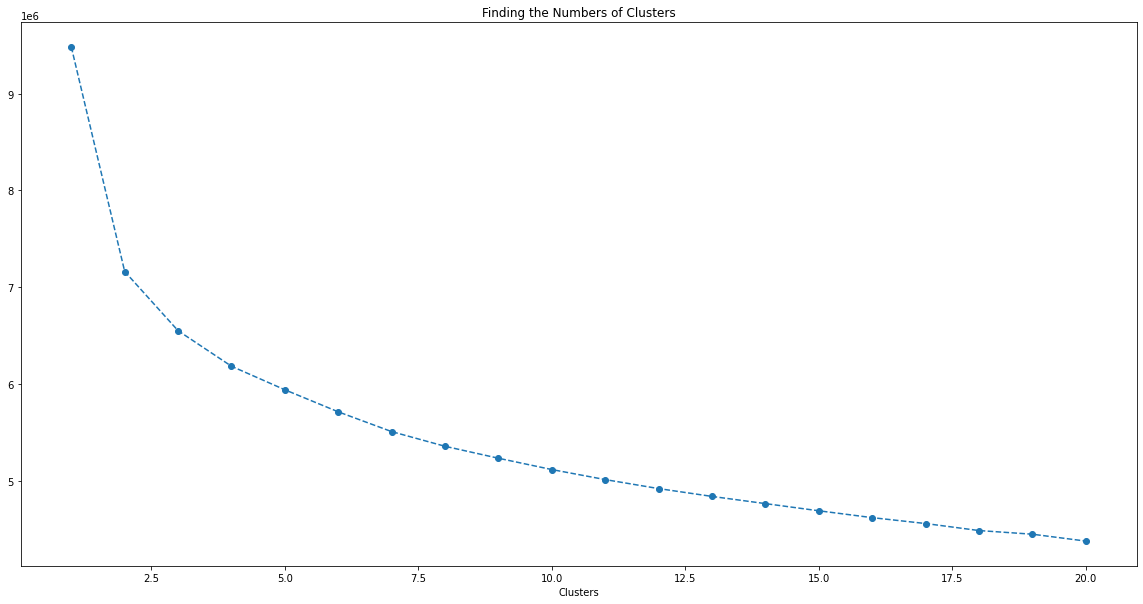

In [27]:
plt.figure(figsize = (20,10))
plt.plot(range(1,21),elbow, marker = 'o', linestyle ='--')
plt.title('Finding the Numbers of Clusters')
plt.xlabel('Clusters')

In [27]:
# We chose 5 clusters
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state =42)

In [28]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [29]:
df_cus_aisle = pd.concat([cus_aisle.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_cus_aisle.columns.values[-17:] = ['Comp_1','Comp_2','Comp_3','Comp_4','Comp_5','Comp_6','Comp_7','Comp_8','Comp_9','Comp_10','Comp_11','Comp_12','Comp_13','Comp_14','Comp_15','Comp_16','Comp_17']
df_cus_aisle['Seg K-mean pca'] = kmeans_pca.labels_

In [30]:
df_cus_aisle.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15,Comp_16,Comp_17,Seg K-mean pca
0,0,0,0,0,0,0,0,0,0,0,...,0.736427,0.909618,0.340996,0.295249,0.466310,-0.325100,-0.013534,-0.227068,-0.332752,0
1,0,3,0,0,0,0,2,0,0,0,...,0.844437,-0.451855,0.547714,0.251799,-0.012583,0.858034,-0.695025,0.202036,-0.034160,3
2,0,0,0,0,0,0,0,0,0,0,...,0.011332,-0.017538,-0.160381,0.140331,-0.601227,0.084640,-0.067016,0.156599,-0.153092,0
3,0,0,0,0,0,0,0,0,0,0,...,-0.079452,-0.151191,0.109973,-0.024973,0.046109,0.126635,-0.106361,0.019965,-0.162714,0
4,0,2,0,0,0,0,0,0,0,0,...,-0.221142,-0.080425,-0.180600,0.063150,0.011937,-0.140437,0.018557,-0.025967,0.291368,0


In [32]:
df_cus_aisle['Segment']= df_cus_aisle['Seg K-mean pca'].map({0:'First clst',1:'Second clst',2:'Third clst',3:'Fourth clst',4:'Fifth clst'})

/Users/minhyeon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


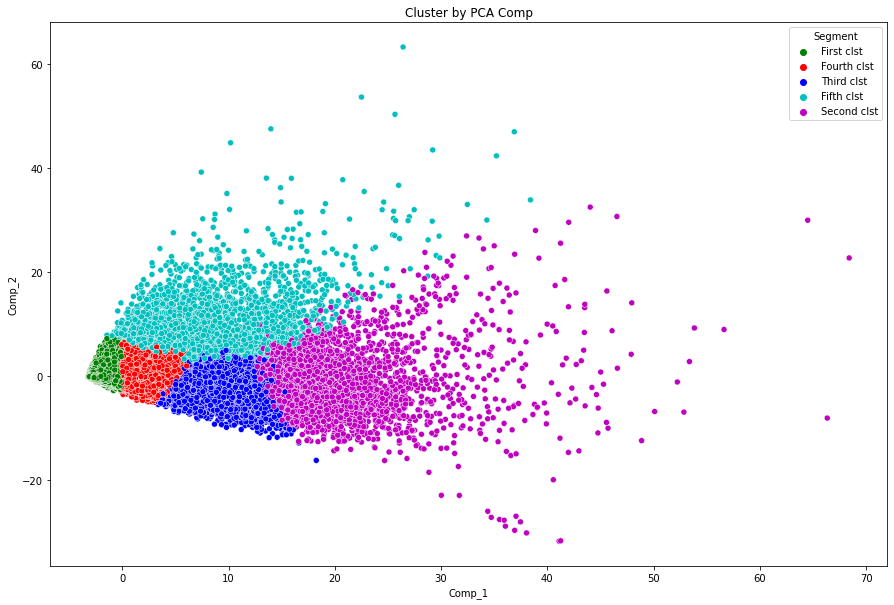

In [33]:
plt.figure(figsize = (15,10))
sns.scatterplot(df_cus_aisle['Comp_1'], df_cus_aisle['Comp_2'], hue = df_cus_aisle['Segment'], palette = ['g','r','b','c','m'])
plt.title('Cluster by PCA Comp')
plt.show()


In [34]:
clust_aisle = cus_aisle.copy()

In [35]:
cluster = df_cus_aisle['Seg K-mean pca'].tolist()

In [36]:
#Adding clustering information in the dataset
clust_aisle['cluster'] = cluster
clust_aisle

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,3
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
206206,0,4,0,0,0,0,4,1,0,0,...,0,0,0,0,1,0,1,0,0,3
206207,0,0,0,0,1,0,0,0,0,0,...,4,0,2,1,0,0,11,0,15,3


(206209, 135)


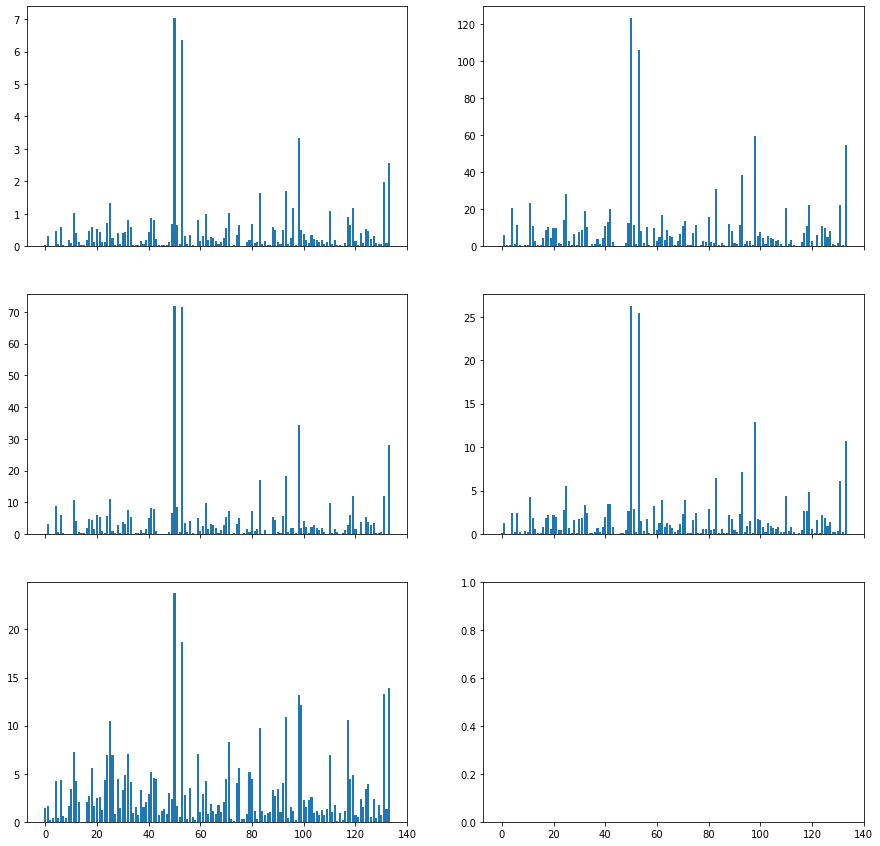

In [37]:
#Top Products for each cluster
print (clust_aisle.shape)
f,arr = plt.subplots(3,2,sharex=True,figsize=(15,15))

c1_count = len(clust_aisle[clust_aisle['cluster']==0])

c0 = clust_aisle[clust_aisle['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_aisle.drop('cluster',axis=1).columns)),c0)
c1 = clust_aisle[clust_aisle['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_aisle.drop('cluster',axis=1).columns)),c1)
c2 = clust_aisle[clust_aisle['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_aisle.drop('cluster',axis=1).columns)),c2)
c3 = clust_aisle[clust_aisle['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_aisle.drop('cluster',axis=1).columns)),c3)
c4 = clust_aisle[clust_aisle['cluster']==4].drop('cluster',axis=1).mean()
arr[2,0].bar(range(len(clust_aisle.drop('cluster',axis=1).columns)),c4)
plt.show()

Finding out the top 5 aisles for each cluster

In [38]:
#Cluster 0_First clst
cluster0_df = pd.DataFrame(c0)
cluster0_df['aisle'] = cluster0_df.index
cluster0_df = cluster0_df.reset_index(drop=True)
cluster0_df['cluster'] = 0
cluster0_df.columns = ['imp','aisle','cluster']
cluster0_df = cluster0_df.sort_values('imp', ascending=False)
cluster0_df  = cluster0_df[['cluster','aisle']]
cluster0_df = cluster0_df.iloc[0:5]
cluster0_df['aisle_n'] = ['aisle1','aisle2','aisle3','aisle4','aisle5']
cluster0_df = cluster0_df.pivot(index='cluster', columns='aisle_n', values='aisle')
cluster0_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5
cluster,,,,,
0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water


In [39]:
#Cluster 1_Second clst
cluster1_df = pd.DataFrame(c1)
cluster1_df['aisle'] = cluster1_df.index
cluster1_df = cluster1_df.reset_index(drop=True)
cluster1_df['cluster'] = 1
cluster1_df.columns = ['imp','aisle','cluster']
cluster1_df = cluster1_df.sort_values('imp', ascending=False)
cluster1_df  = cluster1_df[['cluster','aisle']]
cluster1_df = cluster1_df.iloc[0:5]
cluster1_df['aisle_n'] = ['aisle1','aisle2','aisle3','aisle4','aisle5']
cluster1_df = cluster1_df.pivot(index='cluster', columns='aisle_n', values='aisle')
cluster1_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5
cluster,,,,,
1,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese


In [40]:
#Cluster 2_Third clst
cluster2_df = pd.DataFrame(c2)
cluster2_df['aisle'] = cluster2_df.index
cluster2_df = cluster2_df.reset_index(drop=True)
cluster2_df['cluster'] = 2
cluster2_df.columns = ['imp','aisle','cluster']
cluster2_df = cluster2_df.sort_values('imp', ascending=False)
cluster2_df  = cluster2_df[['cluster','aisle']]
cluster2_df = cluster2_df.iloc[0:5]
cluster2_df['aisle_n'] = ['aisle1','aisle2','aisle3','aisle4','aisle5']
cluster2_df = cluster2_df.pivot(index='cluster', columns='aisle_n', values='aisle')
cluster2_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5
cluster,,,,,
2,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese


In [41]:
#Cluster 3_Fourth clst
cluster3_df = pd.DataFrame(c3)
cluster3_df['aisle'] = cluster3_df.index
cluster3_df = cluster3_df.reset_index(drop=True)
cluster3_df['cluster'] = 3
cluster3_df.columns = ['imp','aisle','cluster']
cluster3_df = cluster3_df.sort_values('imp', ascending=False)
cluster3_df  = cluster3_df[['cluster','aisle']]
cluster3_df = cluster3_df.iloc[0:5]
cluster3_df['aisle_n'] = ['aisle1','aisle2','aisle3','aisle4','aisle5']
cluster3_df = cluster3_df.pivot(index='cluster', columns='aisle_n', values='aisle')
cluster3_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5
cluster,,,,,
3,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese


In [42]:
#Cluster 4_Fifth clst
cluster4_df = pd.DataFrame(c4)
cluster4_df['aisle'] = cluster4_df.index
cluster4_df = cluster4_df.reset_index(drop=True)
cluster4_df['cluster'] = 4
cluster4_df.columns = ['imp','aisle','cluster']
cluster4_df = cluster4_df.sort_values('imp', ascending=False)
cluster4_df  = cluster4_df[['cluster','aisle']]
cluster4_df = cluster4_df.iloc[0:5]
cluster4_df['aisle_n'] = ['aisle1','aisle2','aisle3','aisle4','aisle5']
cluster4_df = cluster4_df.pivot(index='cluster', columns='aisle_n', values='aisle')
cluster4_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5
cluster,,,,,
4,fresh fruits,fresh vegetables,yogurt,water seltzer sparkling water,packaged vegetables fruits


In [43]:
#Checking top 5 aisle information for each cluster
cluster_df = pd.concat([cluster0_df,cluster1_df,cluster2_df,cluster3_df,cluster4_df])
cluster_df['cluster'] = cluster_df.index
cluster_df = cluster_df.reset_index(drop=True)
cluster_df

aisle_n,aisle1,aisle2,aisle3,aisle4,aisle5,cluster
0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water,0
1,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,1
2,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,2
3,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,3
4,fresh fruits,fresh vegetables,yogurt,water seltzer sparkling water,packaged vegetables fruits,4


In [44]:
#Adding user_id and cluster information 
clust_aisle['user_id'] = clust_aisle.index
clust_aisle = clust_aisle.reset_index(drop=True)
clust_aisle

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster,user_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,3,0,0,0,0,2,0,0,0,...,1,0,0,0,0,2,0,42,3,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,206205
206205,0,4,0,0,0,0,4,1,0,0,...,0,0,0,1,0,1,0,0,3,206206
206206,0,0,0,0,1,0,0,0,0,0,...,0,2,1,0,0,11,0,15,3,206207
206207,0,3,0,0,3,0,4,0,0,0,...,0,7,0,0,0,0,0,33,2,206208


In [45]:
user_cluster = clust_aisle.join(cluster_df, on='cluster', rsuffix='_')
user_cluster = user_cluster[['user_id','cluster','aisle1','aisle2','aisle3','aisle4','aisle5']]
user_cluster.head()

,user_id,cluster,aisle1,aisle2,aisle3,aisle4,aisle5
0,1,0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water
1,2,3,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese
2,3,0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water
3,4,0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water
4,5,0,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,water seltzer sparkling water


In [47]:
#Adding top product info next to aisle info
user_cluster_prod = user_cluster.merge(top_prod_aisle, left_on='aisle1', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle2', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle3', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle4', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle5', right_on='aisle', how='left')
user_cluster_prod = user_cluster_prod.iloc[:,[0,1,2,8,3,10,4,12,5,14,6,16]]
user_cluster_prod.columns = ['user_id', 'cluster', 'aisle1', 'product1', 'aisle2',
       'product2', 'aisle3', 'product3', 'aisle4',
       'product4', 'aisle5', 'product5']
user_cluster_prod[user_cluster_prod['cluster']==4].head()

/var/folders/kd/bs8rygp52pg5dh7vpphm0wrh0000gn/T/ipykernel_59479/2517531905.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'aisle_x', 'product_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  user_cluster_prod = user_cluster.merge(top_prod_aisle, left_on='aisle1', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle2', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle3', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle4', right_on='aisle', how='left').merge(top_prod_aisle, left_on='aisle5', right_on='aisle', how='left')


,user_id,cluster,aisle1,product1,aisle2,product2,aisle3,product3,aisle4,product4,aisle5,product5
116,117,4,fresh fruits,Banana,fresh vegetables,Organic Yellow Onion,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,water seltzer sparkling water,Sparkling Water Grapefruit,packaged vegetables fruits,Organic Baby Spinach
126,127,4,fresh fruits,Banana,fresh vegetables,Organic Yellow Onion,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,water seltzer sparkling water,Sparkling Water Grapefruit,packaged vegetables fruits,Organic Baby Spinach
132,133,4,fresh fruits,Banana,fresh vegetables,Organic Yellow Onion,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,water seltzer sparkling water,Sparkling Water Grapefruit,packaged vegetables fruits,Organic Baby Spinach
153,154,4,fresh fruits,Banana,fresh vegetables,Organic Yellow Onion,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,water seltzer sparkling water,Sparkling Water Grapefruit,packaged vegetables fruits,Organic Baby Spinach
215,216,4,fresh fruits,Banana,fresh vegetables,Organic Yellow Onion,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,water seltzer sparkling water,Sparkling Water Grapefruit,packaged vegetables fruits,Organic Baby Spinach
